## Create widget

In [1]:
from ipywidgets import interact
from ipywidgets import interactive
#fixed, interact_manual,
import ipywidgets as widgets
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
#import seaborn as sns
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=8):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=1.*fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

In [2]:
LSBG_df = pd.read_csv('LSBG_sample.csv')
mag_g = LSBG_df['mag_g'].values
mag_r = LSBG_df['mag_r'].values
mag_i = LSBG_df['mag_i'].values

R_eff_g = LSBG_df['R_eff_g'].values
R_eff_i = LSBG_df['R_eff_i'].values
n_ser = LSBG_df['n_ser'].values

RA = LSBG_df['RA'].values
DEC = LSBG_df['DEC'].values

#LSBG_df.head()
for i in range(len(RA)):
    if (RA[i] > 150.):
        RA[i] = RA[i]-360.

In [3]:
# Define the colors here
col_g_i = mag_g - mag_i
col_g_r = mag_g - mag_r
col_i_r = mag_i - mag_r

# Define the point in g-i color, that divides red from blue galaxies
med_g_i = 0.59109109

In [4]:
#import skymap as smap
#from skymap import DESSkymap

In [5]:
ra_red = RA[col_g_i>med_g_i]
dec_red = DEC[col_g_i>med_g_i]
# ===================================================
ra_blue = RA[(col_g_i<med_g_i)]
dec_blue = DEC[(col_g_i<med_g_i)]

In [26]:
def mag_red(g_band_low, g_band_up):
    g_red = mag_g[col_g_i>med_g_i]
    ra_red_g = ra_red[(g_red>g_band_low)&(g_red<g_band_up)]
    dec_red_g = dec_red[(g_red>g_band_low)&(g_red<g_band_up)]
    # =========================================
    # =========================================
    plt.figure(figsize = (4.0,3.0))
    #smap = DESSkymap()
    plt.scatter(ra_red_g, dec_red_g, c='r', rasterized=True, s=0.05)
    #smap.draw_des(color='k',linewidth=0.7,label='DES footprint')
    plt.scatter(150,10,c='r',s=6,alpha=1, label='Red LSBGs')
    # =========================================
    # =========================================
    plt.xlabel("RA [deg]", fontsize=10)
    plt.ylabel("Dec [deg]", fontsize=10)
    plt.xlim(110,-70);plt.ylim(-70,10)
    plt.legend(frameon=True, loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()   

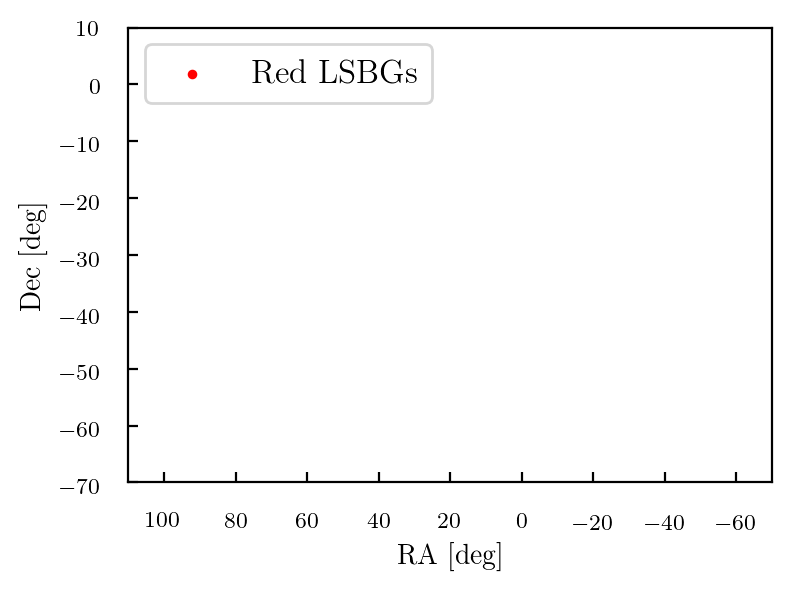

In [27]:
interact(mag_red, g_band_low=(16.5,22.5,0.1), g_band_up=(16.5,22.5,0.1));

In [29]:
def mag_blue(g_band_low, g_band_up):
    g_blue = mag_g[col_g_i<med_g_i]
    ra_blue_g = ra_blue[(g_blue>g_band_low)&(g_blue<g_band_up)]
    dec_blue_g = dec_blue[(g_blue>g_band_low)&(g_blue<g_band_up)]
    # =========================================
    # =========================================
    plt.figure(figsize = (4.0,3.0))
    #smap = DESSkymap()
    plt.scatter(ra_blue_g, dec_blue_g, c='mediumblue', rasterized=True, s=0.05)
    #smap.draw_des(color='k',linewidth=0.7,label='DES footprint')
    plt.scatter(150,10,c='mediumblue',s=6,alpha=1, label='blue LSBGs')
    # =========================================
    # =========================================
    plt.xlabel("RA [deg]", fontsize=10)
    plt.ylabel("Dec [deg]", fontsize=10)
    plt.xlim(110,-70);plt.ylim(-70,10)
    plt.legend(frameon=True, loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()   

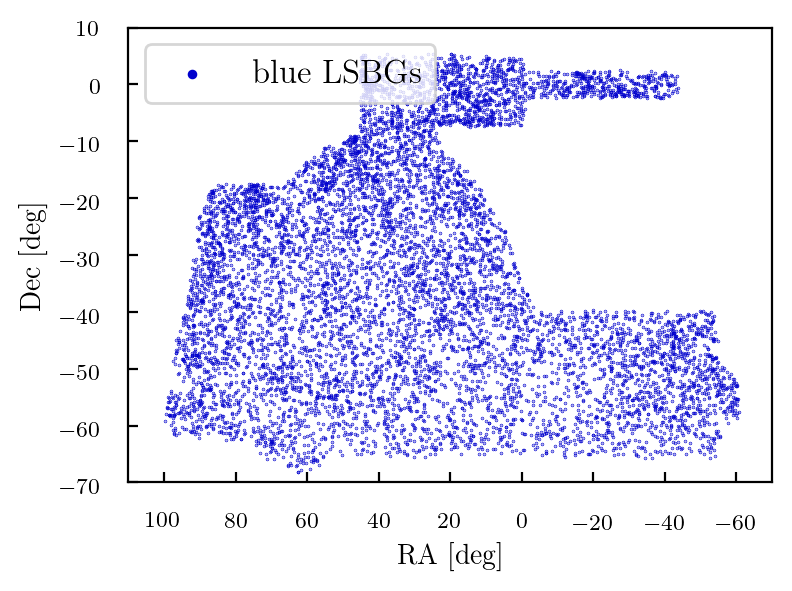

In [30]:
interact(mag_blue, g_band_low=(16.5,22.5,0.1), g_band_up=(16.5,22.5,0.1));